## Machine Learning Exercise 1: Regression Basics ##

In this exercise, you'll be working with a dataset on house sales in King County, Washington. You can get more information about this dataset [here](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction). Our first goal is to build a predictive model for the sales price.

We'll start with a simple model, one which uses just the square footage of living space as our only predictor variable.



In [2]:
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [3]:
data = pd.read_csv('../data/kc_house_data.csv')

In [4]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


1. Before building the model, start by looking at a scatterplot of price vs. the square footage of living space. What do you find? How strong does the relationship appear to be?

Now, let's work towards building the model. 

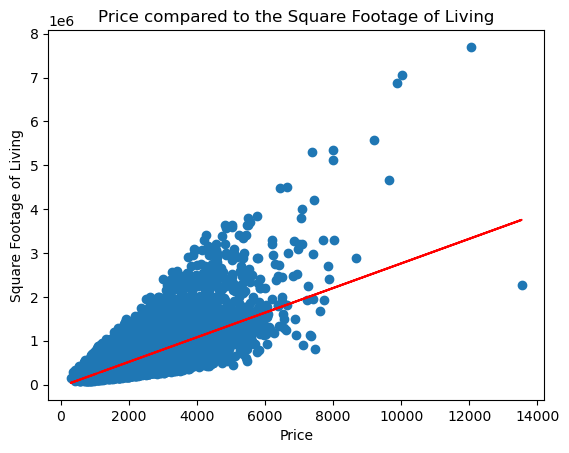

In [6]:
x = data['sqft_living']
y = data['price']

plt.title('Price compared to the Square Footage of Living')
plt.xlabel('Price')
plt.ylabel('Square Footage of Living')
plt.scatter(x=x, y=y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

In [7]:
data[['price', 'sqft_living']].corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


2. Create a DataFrame, X, which contains one column, the sqft_living space and a Series, y, which contains the target variable.

One of the most important concepts when it comes to machine learning is that the only performance we care about is how well the model predicts on data that it has not seen yet.

One way to accomplish this is through setting aside a portion of the data as a **test set** and to train the model on the remaining portion.

In [52]:
X = data[['sqft_living']]

y = data['price']

print(X, y)

       sqft_living
0             1180
1             2570
2              770
3             1960
4             1680
...            ...
21608         1530
21609         2310
21610         1020
21611         1600
21612         1020

[21613 rows x 1 columns] 0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


3. Use the [train_test_split function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create a training and a test set from X and y. Name the resulting pieces X_train, X_test, y_train, and y_test. When you do this, use 30% of the data in the test set. Also, use the random_state parameter so that we can compare model performance as we change the way we build our model.

Now, we need to fit our model. We'll start with a linear regression model. 



In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)

4. Import the [LinearRegression class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from the linear_model module. Then create a linear regression instance and fit it to the training data.

In some cases, we may want to inspect the model after it has been fit. Here, since we are working with a linear regression model, we could inspect the coefficients. 


In [82]:
reg = LinearRegression()

reg.fit(X_train, y_train)

AttributeError: 'DataFrame' object has no attribute 'reshape'

5. What is the intercept term, and what is the coefficient for sqft_living? How can you interpret how the model is using sqft_living to make predictions? Hint: You can get these values by looking at the .intercept_ and .coef_ attributes of the fit model.

The next step is to evaluate how well the model does on the unseen data.

In [68]:
coefficients = reg.coef_
intercept = reg.intercept_

print(coefficients, intercept)

[281.31390123] -42875.11896606267


6. Use the predict method to generate a set of predictions on X_test. Save the results to y_pred. Question: What type of object is y_pred? What is its shape and how does it compare to y_test?

Now, we can evaluate how well the model did. There are a number of different metrics that could be used. Let's look at five of them, mean squared error, root mean squared error, mean absolute error, mean absolute percentage error, and R^2 score. For more information on these metrics, see https://developer.nvidia.com/blog/a-comprehensive-overview-of-regression-evaluation-metrics/.


In [17]:
y_pred = reg.predict(X_test)

print(type(y_pred), y_pred.shape, type(y_test), y_test.shape)

<class 'numpy.ndarray'> (6484,) <class 'pandas.core.series.Series'> (6484,)


7. Calculate each metric on the test set. For each one, interpret what the number means.

It's always a good idea to see how well your model performs against a simple baseline. In the case of regression, a very simple model would be one that just predicts the overall average home price on the training data.


In [19]:
MSE = mean_squared_error(y_test, y_pred)

MSE

66079560485.167015

In [20]:
RMSE = np.sqrt(MSE)

RMSE

257059.44932090517

In [21]:
MAE = mean_absolute_error(y_test, y_pred)

MAE

171711.62408003412

In [22]:
mean_absolute_error = np.mean(np.abs(y_test - y_pred))

mean_absolute_error

171711.62408003412

In [23]:
MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

MAPE

36.23215576825199

In [24]:
mean_absolute_percentage_error = mean_absolute_percentage_error(y_test, y_pred)

mean_absolute_percentage_error

0.3623215576825199

In [25]:
R_squared = reg.score(X_test, y_test)

R_squared

0.5006261620472554

In [26]:
R2 = r2_score(y_test, y_pred)

R2

0.5006261620472554

8. Create a numpy array that is the same length as y_test which just contains a constant value equal to the mean of the target variable on the training data. Hint: you could use the [full_like function from numpy](https://numpy.org/doc/2.2/reference/generated/numpy.full_like.html) to create this array. Does the model using sqft_living do better than this simple baseline model? 

While we started with a linear regression model, there are other types of models that we could try out. A k-nearest-neighbors model generates predictions by finding the most similar points in the training data and averaging their target values. It is a non-parametric model and doesn't assume a particular form for the relationship between the features and the target. 



In [28]:
y_array = np.full_like(y_test, y_train.mean())

R2 = r2_score(y_test, y_array)

R2

-0.0003569234551628053

In [29]:
MSE = mean_squared_error(y_test, y_array)

MSE

132372064386.09288

In [30]:
RMSE = np.sqrt(MSE)

RMSE

363829.71894293197

9. Fit a [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) to the data using just the square footage of living space and using 5 neighbors. How do the metrics compare to those for the linear regression model?

In [60]:
predictor = ['sqft_living']
target = 'price'

X = data[predictor]
y = data[target]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)

In [64]:
knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [35]:
MSE = mean_squared_error(y_test, y_pred)

MSE

73003774670.7596

In [36]:
RMSE = np.sqrt(MSE)

RMSE

270192.1069734636

In [37]:
MAE = mean_absolute_error(y_test, y_pred)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')

TypeError: 'numpy.float64' object is not callable

In [38]:
MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

MAPE

39.692157539817636

In [40]:
r2 = r2_score(y_test, y_pred)

r2

0.4482987647813129

10. We can see how the KNN model has more flexibility than the Linear Regression model by plotting their predictions. Create a DataFrame which includes a range of typical square footage values. Hint: you can use the [numpy linspace function](https://numpy.org/doc/2.1/reference/generated/numpy.linspace.html). Generate 200 equally spaced values between 500 and 3000. Then generate predictions on these using both the linear regression and KNN model. Plot the predictions. What do you notice?

In [78]:
knn = KNeighborsRegressor(n_neighbors=20).fit(X_train, y_train)

sqft = pd.DataFrame({'sqft_living': np.linspace(start = 500, stop = 3000, num = 100)})
lr_pred = reg.predict('sqft')
knn_pred = knn.predict('sqft')
    
fig, ax = plt.subplots()

sqft.plot(x = 'sqft_living', y = 'lr_pred', ax=ax)
sqft.plot(x = 'sqft_living', y = 'knn_pred', ax=ax);

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array=sqft.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

11. Finally, let's see what happens when we add another variable. Create a new linear regression model which uses both the square footage of living space and whether or not it is waterfront. When you do this, make sure that you're using the same train and test split by using the same random_state as above. By how much does this improve the model's fit?



In [ ]:
X = data[['sqft_living', 'waterfront']]

y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [ ]:
reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [ ]:
R2 = r2_score(y_test, y_pred)

R2

In [ ]:
MAE = mean_absolute_error(y_test, y_pred)

MAE

In [ ]:
MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

MAPE

## Stretch Goals ##


1. One way to add complexity to the model is through using interaction terms. These allow for the relationship between sqft_living and price to differ for waterfront and non-waterfront properties. Create a column containing the product of sqft_living and waterfront. Add this to your model. Does it improve the performance? Interpret the meaning of the coefficients for the model containing the interaction.



2. Take a look at the distribution of home prices. You'll find that it's highly skewed. When the target is skewed, it can be beneficial to transform the target so that it is closer to normally-distributed in order to reduce the effect of extreme values. **Important Note:** When comparing metrics for a transformed target and an untransformed target, it is important that you apply an inverse transformation to the predictions from the transformed model. This can be done using a [TransformedTargetRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.compose.TransformedTargetRegressor.html). Try using a log transformation on the target. Does this improve the metrics for the model?